In [43]:
import pandas as pd 
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [44]:

path = "G:/Project_Stock/Data"


filenames = glob.glob(path + "\*.xlsx")
print('File names:', filenames)


outputxlsx = pd.DataFrame()


for file in filenames:

   df = pd.concat(pd.read_excel( file, sheet_name=None), ignore_index=True, sort=False)


   outputxlsx = outputxlsx.append( df, ignore_index=True)

#print('Final Excel sheet now generated at the same location:')
outputxlsx.shape


File names: ['G:/Project_Stock/Data\\MNRA Historical Data.xlsx', 'G:/Project_Stock/Data\\MONN Historical Data.xlsx', 'G:/Project_Stock/Data\\NRTJ Historical Data.xlsx', 'G:/Project_Stock/Data\\SMLT Historical Data.xlsx', 'G:/Project_Stock/Data\\STCM Historical Data.xlsx']


(9824, 8)

In [45]:
#df = pd.read_excel("G:/Project_Stock/MNRA Historical Data.xlsx")
#df.size
df = outputxlsx

In [46]:
df.shape

(9824, 8)

In [47]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [48]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Code
0,2022-03-06,111.2,111.7,112.7,111.0,94.57K,-0.0045,NaN
1,2022-03-03,111.7,112.5,112.5,110.0,62.78K,0.0000,NaN
2,2022-03-02,111.7,112.8,112.8,111.2,85.17K,-0.0080,NaN
3,2022-03-01,112.6,114.7,115.0,111.9,125.19K,-0.0018,NaN
4,2022-02-28,112.8,115.0,115.2,112.6,135.26K,0.0071,NaN


In [49]:
df["Code"] = df["Code"].fillna(0)
df

,Date,Price,Open,High,Low,Vol.,Change %,Code
0,2022-03-06,111.2,111.7,112.7,111.0,94.57K,-0.0045,0.0
1,2022-03-03,111.7,112.5,112.5,110.0,62.78K,0.0000,0.0
2,2022-03-02,111.7,112.8,112.8,111.2,85.17K,-0.0080,0.0
3,2022-03-01,112.6,114.7,115.0,111.9,125.19K,-0.0018,0.0
4,2022-02-28,112.8,115.0,115.2,112.6,135.26K,0.0071,0.0
...,...,...,...,...,...,...,...,...
9819,2014-08-03,52.0,52.0,52.0,52.0,4.00K,-0.0189,0.0
9820,2014-07-24,53.0,53.0,53.0,53.0,0.50K,0.0600,0.0
9821,2014-07-23,50.0,50.0,50.0,49.0,2.00K,-0.0196,0.0
9822,2014-07-22,51.0,52.0,52.0,50.0,5.00K,0.0000,0.0


In [50]:
df["Vol."]=df['Vol.'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)

In [51]:
df1 = df[[ 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Code']]

In [52]:
df1 = df1[::-1]
df1

,Price,Open,High,Low,Vol.,Change %,Code
9823,51.0,51.0,51.0,50.0,3000,0.0408,0.0
9822,51.0,52.0,52.0,50.0,5000,0.0000,0.0
9821,50.0,50.0,50.0,49.0,2000,-0.0196,0.0
9820,53.0,53.0,53.0,53.0,500,0.0600,0.0
9819,52.0,52.0,52.0,52.0,4000,-0.0189,0.0
...,...,...,...,...,...,...,...
4,112.8,115.0,115.2,112.6,135260,0.0071,0.0
3,112.6,114.7,115.0,111.9,125190,-0.0018,0.0
2,111.7,112.8,112.8,111.2,85170,-0.0080,0.0
1,111.7,112.5,112.5,110.0,62780,0.0000,0.0


In [53]:

df1["VolAvgNDays"] = df1["Vol."].rolling(20).mean()
df1 = df1[df1['VolAvgNDays'].notna()]
df1

,Price,Open,High,Low,Vol.,Change %,Code,VolAvgNDays
9804,46.0,48.0,48.0,45.0,2000,-0.0417,0.0,7325.0
9803,48.0,48.0,48.0,48.0,500,0.0435,0.0,7200.0
9802,48.0,48.0,48.0,48.0,500,0.0000,0.0,6975.0
9801,48.0,48.0,48.0,48.0,500,0.0000,0.0,6900.0
9800,46.0,48.0,48.0,46.0,2500,-0.0417,0.0,7000.0
...,...,...,...,...,...,...,...,...
4,112.8,115.0,115.2,112.6,135260,0.0071,0.0,205753.5
3,112.6,114.7,115.0,111.9,125190,-0.0018,0.0,208421.5
2,111.7,112.8,112.8,111.2,85170,-0.0080,0.0,210099.0
1,111.7,112.5,112.5,110.0,62780,0.0000,0.0,210635.5


In [54]:

corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Open,High,Low,Vol.,Change %,Code,VolAvgNDays
Price,1.000000,0.993523,0.999530,0.999598,-0.069861,0.003015,-0.381307,-0.079700
Open,0.993523,1.000000,0.994051,0.993855,-0.070325,-0.015584,-0.380722,-0.079425
High,0.999530,0.994051,1.000000,0.999361,-0.067810,-0.007568,-0.380397,-0.077848
Low,0.999598,0.993855,0.999361,1.000000,-0.072749,-0.005692,-0.384119,-0.081510
Vol.,-0.069861,-0.070325,-0.067810,-0.072749,1.000000,0.098015,0.099537,0.827837
Change %,0.003015,-0.015584,-0.007568,-0.005692,0.098015,1.000000,0.061880,0.013069
Code,-0.381307,-0.380722,-0.380397,-0.384119,0.099537,0.061880,1.000000,0.103387
VolAvgNDays,-0.079700,-0.079425,-0.077848,-0.081510,0.827837,0.013069,0.103387,1.000000


In [55]:
list(df1.columns)

['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Code', 'VolAvgNDays']

In [56]:
X = df1[["Price","Vol.","VolAvgNDays"]]
y = df1["Code"]
X

,Price,Vol.,VolAvgNDays
9804,46.0,2000,7325.0
9803,48.0,500,7200.0
9802,48.0,500,6975.0
9801,48.0,500,6900.0
9800,46.0,2500,7000.0
...,...,...,...
4,112.8,135260,205753.5
3,112.6,125190,208421.5
2,111.7,85170,210099.0
1,111.7,62780,210635.5


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.86      0.86      0.86       620
         0.0       0.92      0.95      0.94      1402
         1.0       0.88      0.84      0.86       920

    accuracy                           0.90      2942
   macro avg       0.89      0.88      0.89      2942
weighted avg       0.90      0.90      0.90      2942



In [60]:
df2 =  pd.read_excel("G:/Project_Stock/FDLI Historical Data.xlsx")
df2["Vol."]=df2['Vol.'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
df2 = df2[::-1]
df2["VolAvgNDays"] = df2["Vol."].rolling(20).mean()
df2 = df2[df2['VolAvgNDays'].notna()]
pred = clf.predict(df2[["Price","Vol.","VolAvgNDays"]])



In [61]:
df2["pred"] = pred
df2["pred"].value_counts()

1.0    967
0.0    809
Name: pred, dtype: int64

In [62]:
df2

,Date,Price,Open,High,Low,Vol.,Change %,VolAvgNDays,pred
1775,2014-08-25,14.0,15.0,15.0,14.0,328480,0.0000,460251.50,1.0
1774,2014-08-26,14.0,15.0,15.0,14.0,563640,0.0000,473395.50,1.0
1773,2014-08-27,15.0,15.0,15.0,14.0,500920,0.0714,457029.00,1.0
1772,2014-08-28,15.0,15.0,15.0,15.0,212750,0.0000,447650.50,1.0
1771,2014-08-31,14.0,15.0,15.0,14.0,339450,-0.0667,436516.00,1.0
...,...,...,...,...,...,...,...,...,...
4,2022-02-27,31.0,32.5,32.5,30.9,174170,-0.0578,155820.95,0.0
3,2022-02-28,31.3,31.0,31.7,31.0,75740,0.0097,147229.45,0.0
2,2022-03-01,31.7,31.5,32.7,31.5,151870,0.0128,141451.95,0.0
1,2022-03-02,31.3,32.2,32.2,30.9,39330,-0.0126,135170.95,0.0


In [63]:
df2["pred"].unique()

array([1., 0.])

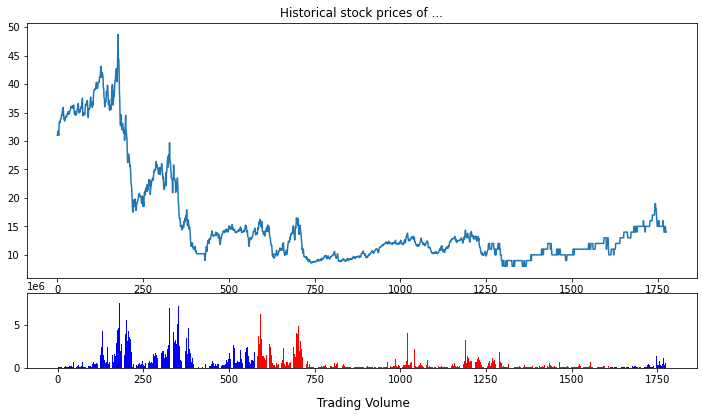

In [64]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
cc=list(map(lambda pred: 'red' if pred == 1 else 'blue', y))
top_plt.plot(df2.index, df2["Price"])
plt.title('Historical stock prices of ...' )
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(df2.index, df2['Vol.'], color =cc)
plt.title('\n Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

In [65]:
df3 = df2[(df2["Change %"] == 0) & (df2.pred != 0)]
df3

,Date,Price,Open,High,Low,Vol.,Change %,VolAvgNDays,pred
1775,2014-08-25,14.0,15.0,15.0,14.0,328480,0.0,460251.5,1.0
1774,2014-08-26,14.0,15.0,15.0,14.0,563640,0.0,473395.5,1.0
1772,2014-08-28,15.0,15.0,15.0,15.0,212750,0.0,447650.5,1.0
1770,2014-09-01,14.0,14.0,15.0,14.0,301570,0.0,440789.5,1.0
1769,2014-09-02,14.0,14.0,15.0,14.0,213680,0.0,420537.0,1.0
...,...,...,...,...,...,...,...,...,...
84,2021-11-02,36.6,36.6,37.0,36.4,249320,0.0,274086.5,1.0
78,2021-11-10,34.7,34.4,35.0,34.4,149440,0.0,233870.0,1.0
69,2021-11-23,36.0,36.8,36.9,35.9,141820,0.0,240358.0,1.0
43,2021-12-30,35.8,36.2,36.5,35.7,169350,0.0,220015.0,1.0


In [76]:
import datetime

today = datetime.date.today()
lastfive = today - datetime.timedelta(days=35)

day = today.strftime ("%d/%m/%Y")
five = lastfive.strftime ("%d/%m/%Y")
day

'22/04/2022'

In [25]:
pip install investpy

Note: you may need to restart the kernel to use updated packages.


In [67]:
import investpy

In [78]:
stocks = ["AICL", "APGI"]

merged = pd.DataFrame()

for s in stocks:
    df4 = investpy.get_stock_historical_data(stock= s,
                                        country='Bangladesh',
                                        from_date=five,
                                        to_date= day)
    #df4 = df4[::-1]
    #df3['Change %'] = df3['Close'].pct_change()
    df4["VolAvgNDays"] = df4["Volume"].rolling(15).mean()
    df4 = df4[::-1]
    df4 = df4[df4['VolAvgNDays'].notna()]
    pred1 = clf.predict(df4[["Close","Volume","VolAvgNDays"]])
    df4["pred"] = pred1
    df4["Name"] = s
    print(df4)

            Open  High   Low  Close  Volume Currency    VolAvgNDays  pred  \
Date                                                                        
2022-04-21  48.2  48.2  45.5   46.4   77137      BDT   98004.000000   1.0   
2022-04-20  47.2  47.5  45.7   46.4   55262      BDT  113469.200000   1.0   
2022-04-19  45.0  47.7  44.8   46.5   79580      BDT  112841.266667   1.0   
2022-04-18  46.6  47.0  45.7   45.7   29259      BDT  114927.000000   1.0   
2022-04-17  47.5  47.5  46.5   46.6   61165      BDT  117221.666667   1.0   
2022-04-13  47.2  48.2  47.2   47.4   76613      BDT  116336.466667   1.0   
2022-04-12  48.3  48.5  48.1   48.1   65924      BDT  115038.866667   1.0   
2022-04-11  50.5  50.7  48.9   49.0   75496      BDT  114359.800000   1.0   
2022-04-10  48.9  51.0  47.7   49.8   64115      BDT  114291.000000   1.0   
2022-04-07  48.7  49.3  48.4   48.6   39912      BDT  116088.266667   1.0   

            Name  
Date              
2022-04-21  AICL  
2022-04-20  AICL  

In [79]:
pip install streamlit

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=b7bd6211f19c5ab38ecb0194f1a539184f5dd07888f4b536f4dfec9acfa2f164
  Stored in directory: c:\users\u\appdata\local\pip\cache\wheels\50\93\f8\4f0a42a03a06626d675f13907b6982ad5ecff383530af5a900
Successfully built blinker
Note: you may need to restart the kernel to use updated packages.


In [80]:
import streamlit as st

In [81]:
def main():

	#title 
	st.title("Hello! This is a streamlit tutorial")
	
	#variable
	name = 'Amit'
	
	#text
	st.text("My name is {}".format(name))
	
	#header
	st.header("This is header")
	
	#subheader
	st.subheader("This is subheader")
	
	#markdown
	st.markdown("## This is markdown") 

if __name__ == '__main__':
	main()

2022-04-22 00:46:47.404 
  command:

    streamlit run C:\Users\u\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [27]:
#df2.to_csv (r'G:/Project_Stock/FDLI_W_RollingAvg.csv', index = None, header=True) 